In [53]:
# creating a data set object 
from torch.utils.data import Dataset, DataLoader
import torch

class Data(Dataset):
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.y = -3*self.x + 1
        self.len = self.x.shape[0]

    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len
    

dataset = Data()

In [54]:
# Let's create our neural network : 

import torch.nn as nn 

class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super(LR, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        out = self.linear(x)
        return out

### Creating a cost function for the linear model : 

In [55]:
def criterion(yhat, y):
    return torch.mean( (y - yhat)**2 )

In [56]:
criterion = nn.MSELoss()    # cost function or loss fucntion
trainloader = DataLoader(dataset=dataset, batch_size=1)

In [57]:
# Creating a model : 
model = LR(1, 1)

In [58]:
from torch import nn, optim

optimizer = optim.SGD(model.parameters(), lr=0.01)      # SGD : stochastic gredient descent
optimizer.state_dict()

{'state': {},
 'param_groups': [{'lr': 0.01,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'foreach': None,
   'differentiable': False,
   'params': [0, 1]}]}

In [59]:
for epoch in range(100):
    for x, y in trainloader:
        yhat = model(x) # Making predictions
        loss = criterion(yhat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()    # Instead of updating prams manually like w.data = w.data - lr * w.grad.data and b.data - lr b.grad.data ...

### Training, validation and test Split

We have a data $D = \{(x_1, y_1), (x_2, y_2), ..., (x_{30}, y_{30})\}$ we will use :

$D_{train} = \{(x_1, y_1), (x_2, y_2), ..., (x_{20}, y_{20})\}$

$D_{validation} = \{(x_{21}, y_{21}), (x_{22}, y_{22}), ..., (x_{25}, y_{25})\}$

$D_{validation} = \{(x_{26}, y_{26}), (x_{27}, y_{27}), ..., (x_{30}, y_{30})\}$

In [60]:
class Data2(Dataset):
    def __init__(self, train = True):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.f = -3*self.x + 1
        self.y = self.f + 0.1 * torch.randn(self.x.size())
        self.len = self.x.shape[0]
        if train == True:
            self.y[0] = 0
            self.y[50: 55] = 20
        else:
            pass

    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len

In [61]:
train_data = Data2()
val_data = Data2(train=False)

In [62]:
epochs = 10
learning_rates = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
validation_error = torch.zeros( len(learning_rates) )
test_error = torch.zeros( len(learning_rates) )
modules = []


Let's train our model : 

In [63]:
for i, learning_rate in enumerate(learning_rates):
    model = LR(1, 1)
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    for epoch in range(100):
        for x, y in trainloader:
            yhat = model(x) # Making predictions
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step() 
    yhat = model(train_data.x)
    loss = criterion(yhat, train_data.y)
    test_error[i] = loss.item()

    yhat = model(val_data.x)
    loss = criterion(yhat, val_data.y)
    validation_error[i] = loss.item()

    modules.append(model)


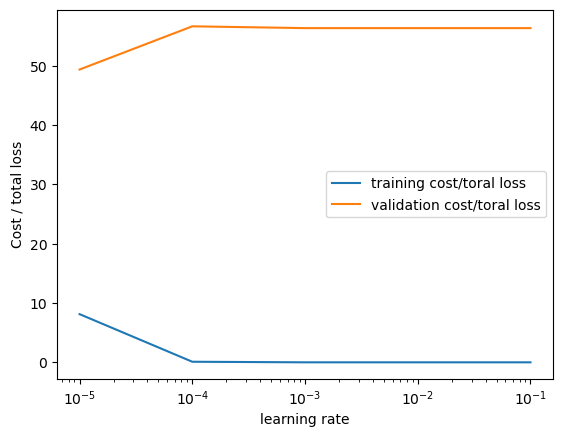

In [64]:
import numpy as np
import matplotlib.pyplot as plt

plt.semilogx(np.array(learning_rates), validation_error.numpy(), label="training cost/toral loss")
plt.semilogx(np.array(learning_rates), test_error.numpy(), label="validation cost/toral loss")
plt.ylabel("Cost / total loss")
plt.xlabel("learning rate")
plt.legend()
plt.show()

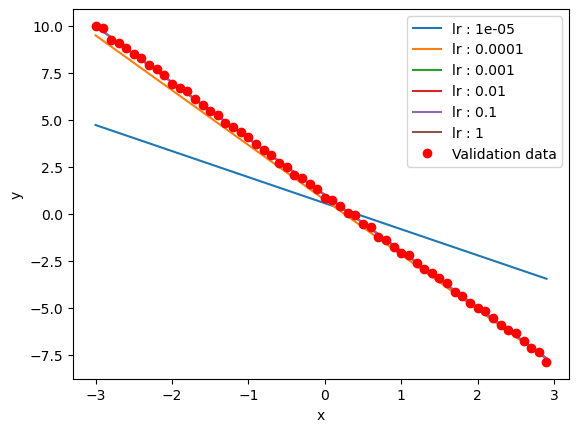

In [66]:
for model, learning_rate in zip(modules, learning_rates) :
    yhat = model(val_data.x)
    plt.plot(val_data.x.numpy(), yhat.detach().numpy(), label = "lr : " + str(learning_rate))

plt.plot(val_data.x.numpy(), val_data.y.numpy(), 'or', label="Validation data")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()